#Problem Statement
You are the data scientist at a medical research facility. The facility wants you to build a machine learning model to classify if the given data of a patient should tell if the patient is at the risk of a heart attack.

Heart Disease Dataset:
UCI Heart Disease Dataset
(https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)

Importing necessary libraries

In [119]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
from sklearn.metrics import *
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Tasks To Be Performed

##1. Data Analysis:

###a. Import the dataset  

In [120]:
df=pd.read_csv('heartdataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###b. Get information about the dataset (mean, max, min, quartiles, shape, info, describe, dtypes, corr etc.)     

In [121]:
df.shape

(303, 14)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [123]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [124]:
df.duplicated().sum()

1

In [125]:
df.drop_duplicates(inplace=True)

In [126]:
df.duplicated().sum()

0

###c. Find the correlation between all fields

In [127]:
#Correlation-relationship between 2 variables
#Positive corr - directly proportional
#Negative corr - inversely proportional
#Zero corr - no effect
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


##2. Data Visualization:

###a. Visualize the number of patients having a heart disease and not having a heart disease

<Axes: xlabel='target', ylabel='count'>

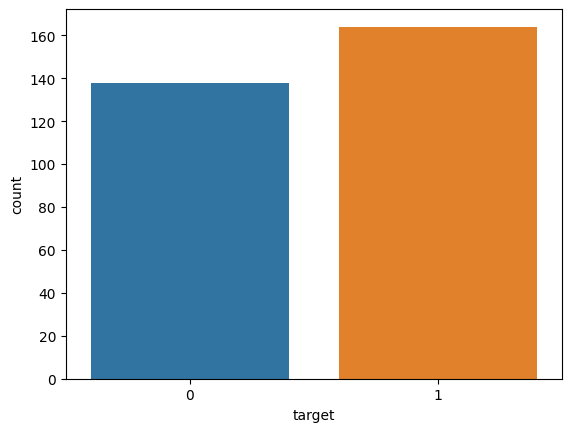

In [128]:
sns.countplot(x=df['target'])

###b. Visualize the age and whether a patient has disease or not

<Axes: xlabel='age', ylabel='count'>

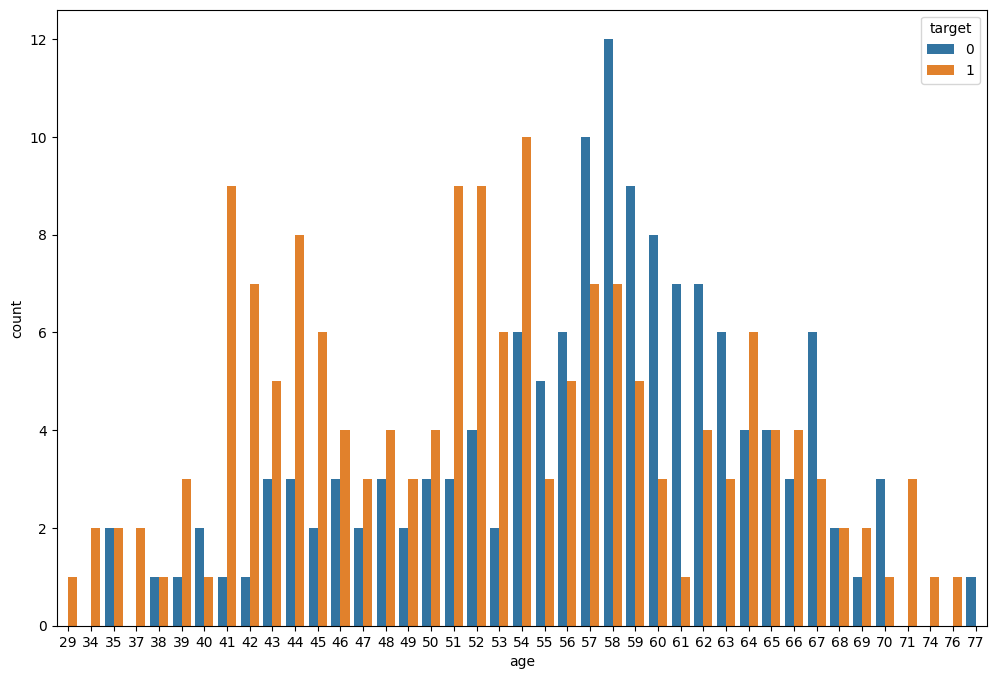

In [129]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['age'],hue='target',data=df)

###c. Visualize correlation between all features using a heat map

<Axes: >

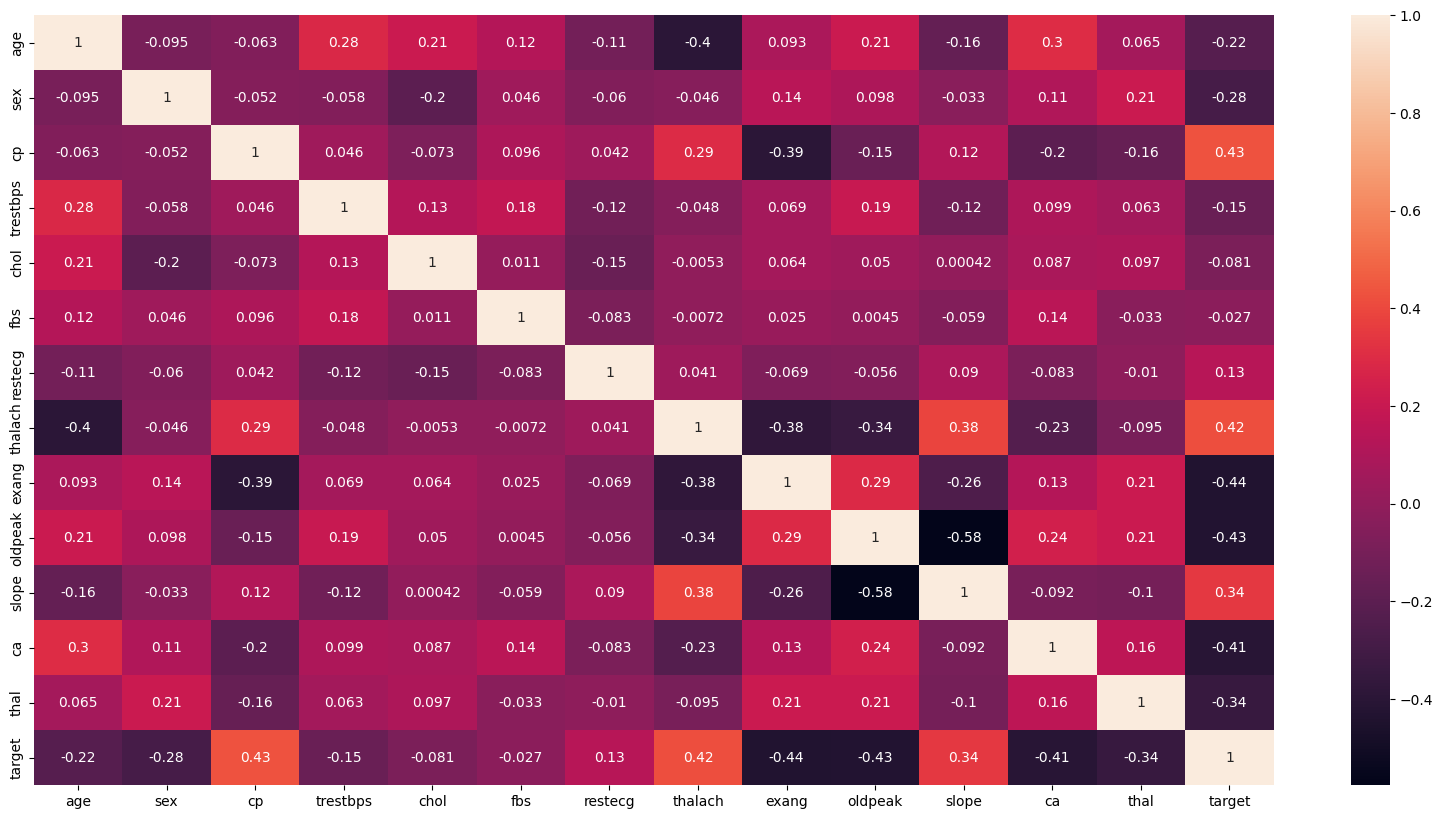

In [130]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [131]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##3. Logistic Regression:

###a. Build a simple logistic regression model:
    
i. Divide the dataset in 70:30 ratio

In [132]:
x=df.iloc[:,:-1]    #independent column
y=df['target']      #dependent column

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=18)

ii. Build the model on train set and predict the values on test set

In [134]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0])

iii. Build the confusion matrix and get the accuracy score

In [136]:
lr_clRep=classification_report(y_test,y_pred)
lr_conMat=confusion_matrix(y_test,y_pred)

In [137]:
print('Confusion matrix:\n',lr_conMat)
print('\nAccuracy =',accuracy_score(y_test,y_pred))

Confusion matrix:
 [[32  8]
 [ 5 46]]

Accuracy = 0.8571428571428571


##4. Decision Tree:

###a. Build a decision tree model:

i. Divide the dataset in 70:30 ratio

In [138]:
x=df.iloc[:,:-1]    #independent column
y=df['target']      #dependent column

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

ii. Build the model on train set and predict the values on test set

In [140]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [141]:
pred_test=clf.predict(x_test)
pred_test

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1])

iii. Build the confusion matrix and calculate the accuracy

In [142]:
dt_clRep=classification_report(y_test,y_pred)
dt_conMat=confusion_matrix(y_test,y_pred)

In [143]:
print('Confusion matrix:\n',dt_conMat)
print('\nAccuracy =',accuracy_score(y_test,y_pred))

Confusion matrix:
 [[18 25]
 [19 29]]

Accuracy = 0.5164835164835165


In [144]:
model=tree.DecisionTreeClassifier(max_depth=3)
dt_model=model.fit(x_train,y_train)
dt_model

DecisionTreeClassifier(max_depth=3)

In [145]:
y_pred=model.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)*100
print('Accuracy when max_depth is set to 3 =',acc_score,'% (highest)')

Accuracy when max_depth is set to 3 = 86.81318681318682 % (highest)


Thus accuracy of the model was increased by tuning the parameter

iv. Visualize the decision tree using the Graphviz package

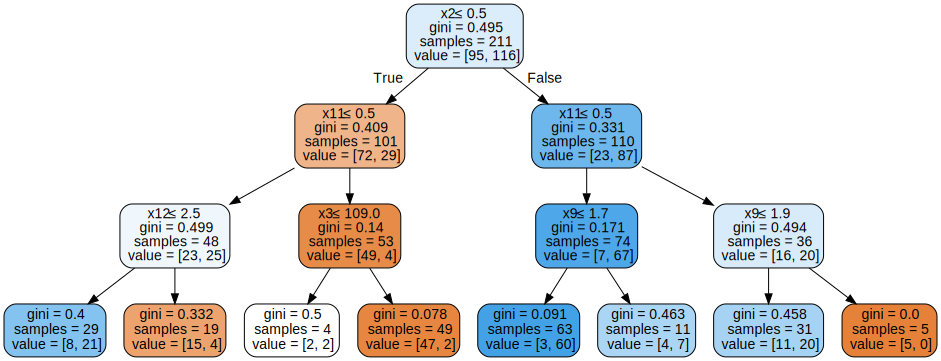

In [151]:
import graphviz
dot_data = tree.export_graphviz(dt_model,
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

##5. Random Forest:

###a. Build a Random Forest model:

i. Divide the dataset in 70:30 ratio


In [152]:
x=df.iloc[:,:-1]    #independent column
y=df['target']      #dependent column

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

ii. Build the model on train set and predict the values on test set

In [158]:
rfc=RandomForestClassifier(n_estimators=300)
rf_model=rfc.fit(x_train,y_train)
rf_model

RandomForestClassifier(n_estimators=300)

In [159]:
y_pred=rfc.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1])

iii. Build the confusion matrix and calculate the accuracy

In [160]:
rf_clRep=classification_report(y_test,y_pred)
rf_conMat=confusion_matrix(y_test,y_pred)

In [161]:
print('Confusion matrix:\n',rf_conMat)
print('\nAccuracy =',accuracy_score(y_test,y_pred))

Confusion matrix:
 [[33 10]
 [ 6 42]]

Accuracy = 0.8241758241758241


iv. Visualize the model using the Graphviz package

In [170]:
import pydotplus, six
from sklearn.tree import export_graphviz

dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rfc.estimators_:
    if (i_tree <1):
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        export_graphviz(tree_in_forest,
                    feature_names=x.columns,
                    filled=True,
                    rounded=True)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
        i_tree = i_tree + 1

In [171]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

512

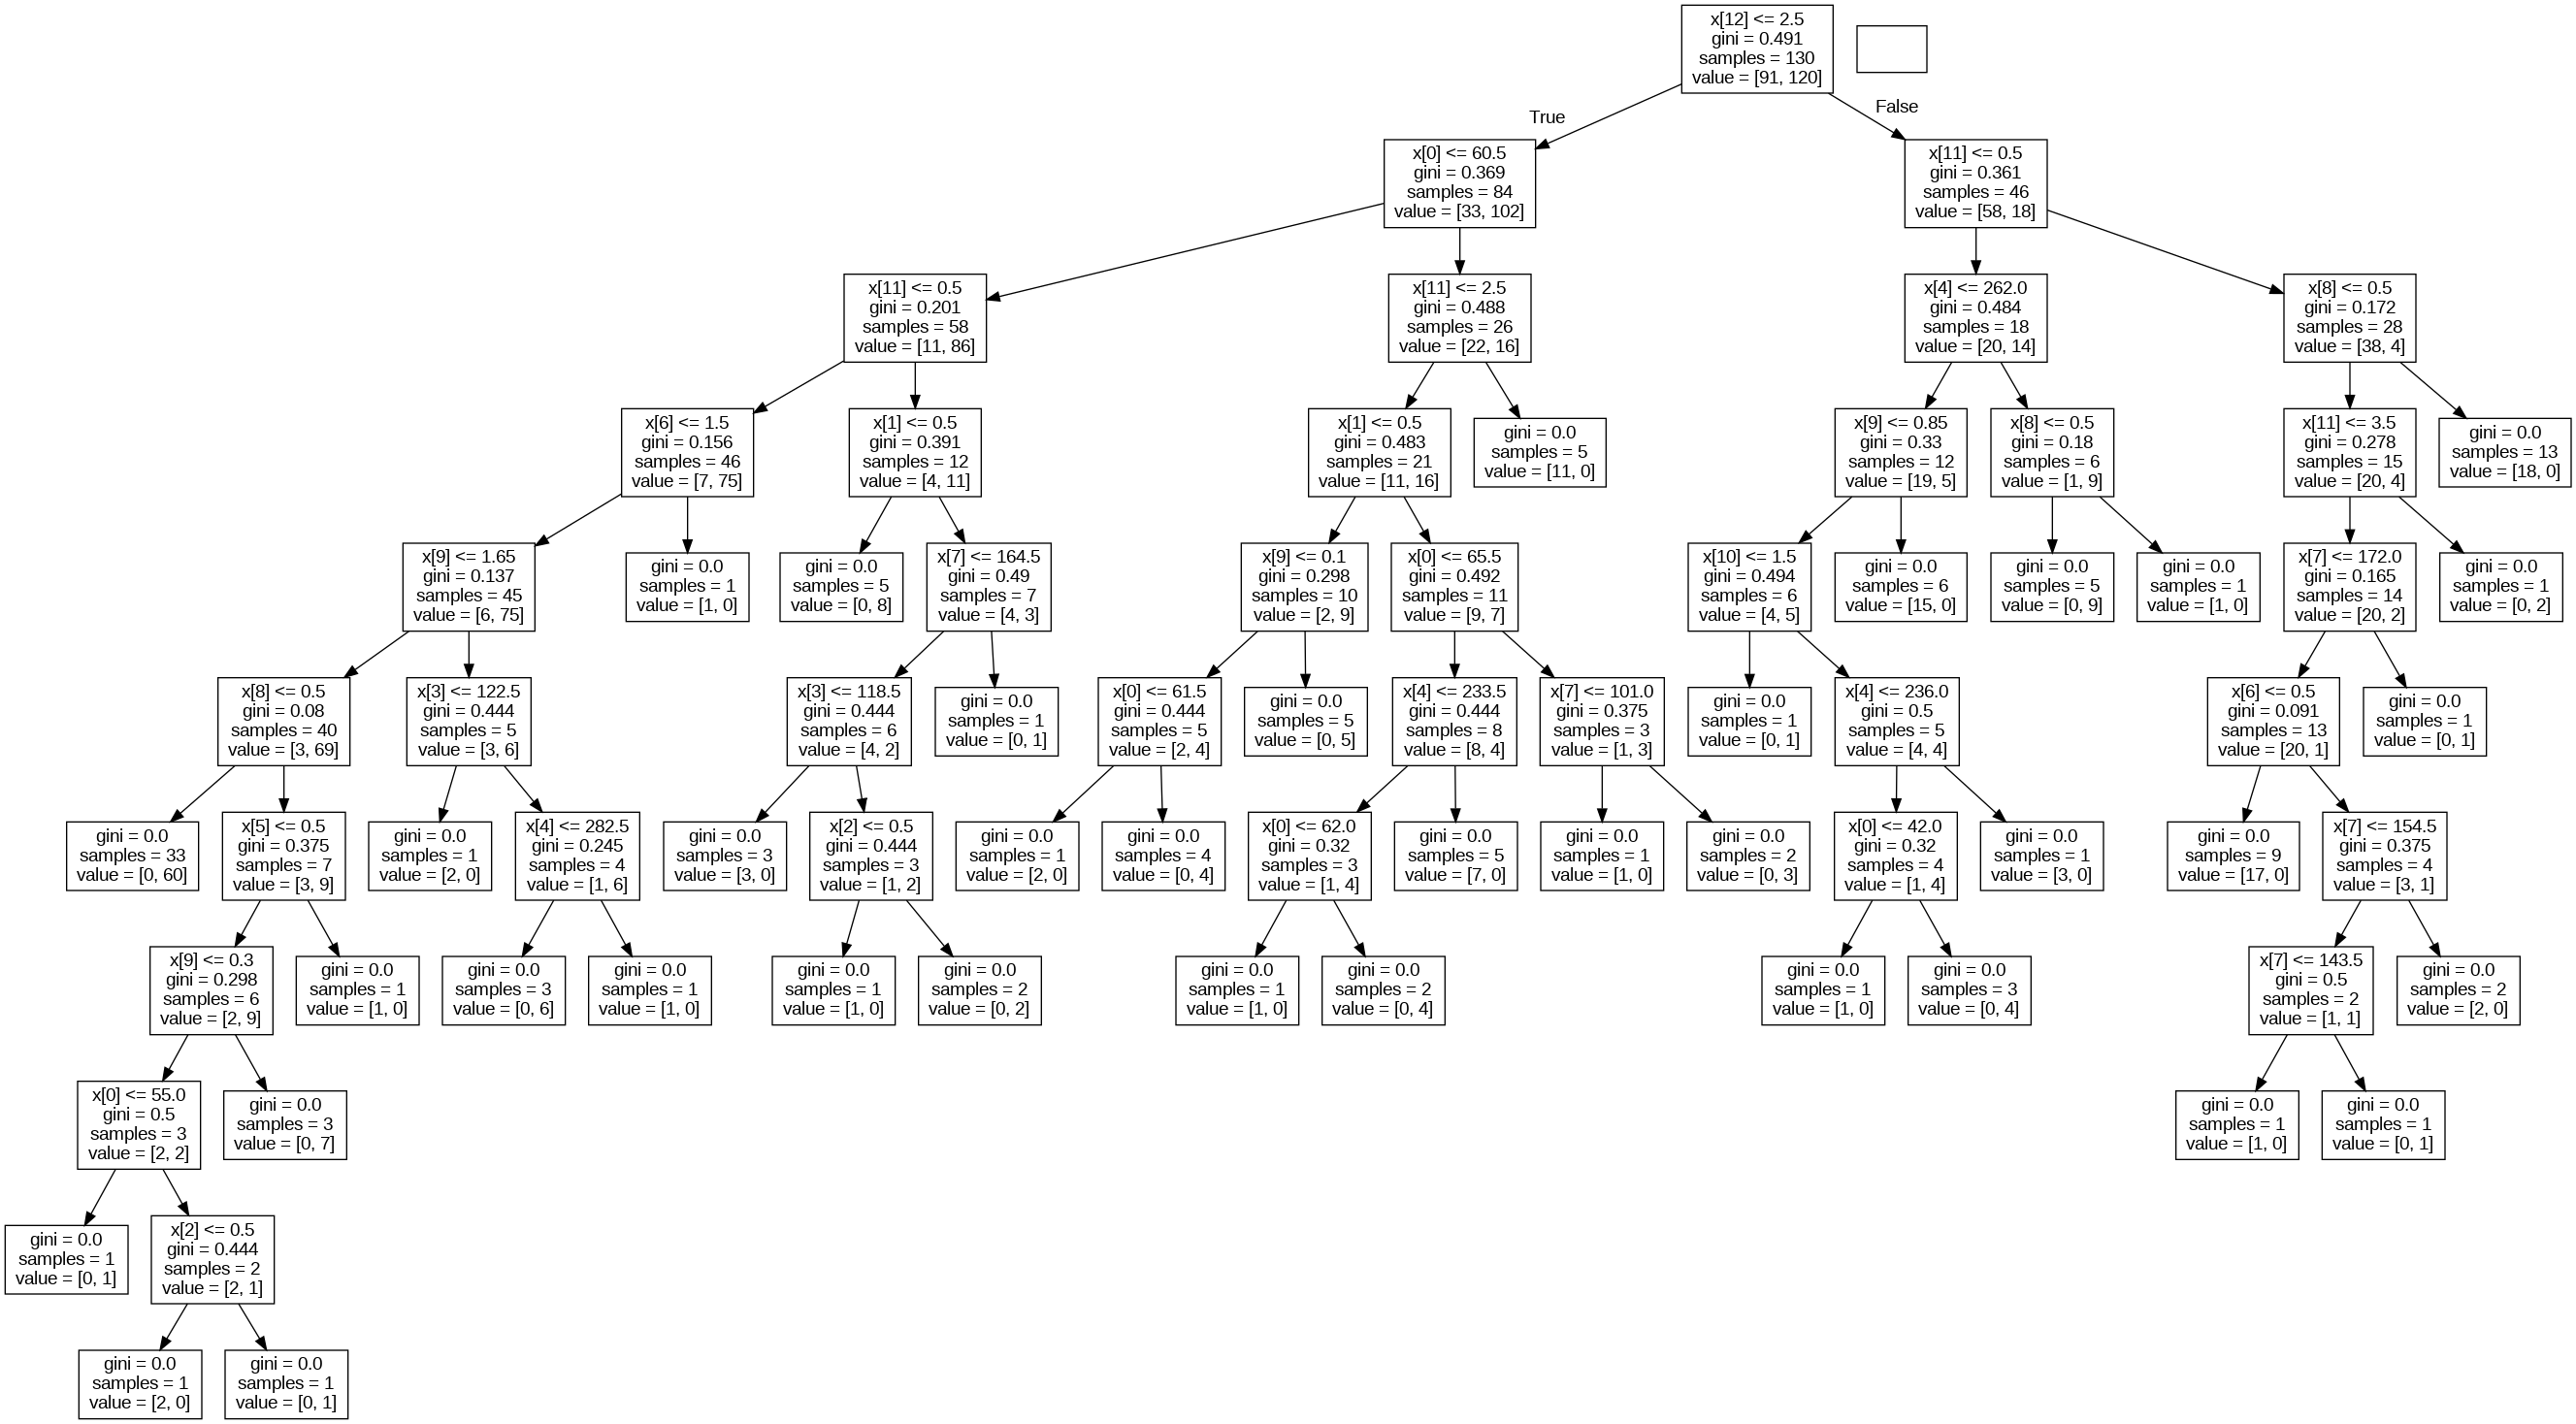

##6. Select the best model

###a. Print the confusion matrix of all classifiers

In [174]:
print('Confusion matrix of used classifiers:\nLogistic Regression\n',lr_conMat,'\nDecision Tree\n',dt_conMat,'\nRandom Forest\n',rf_conMat)

Confusion matrix of used classifiers:
Logistic Regression
 [[32  8]
 [ 5 46]] 
Decision Tree
 [[18 25]
 [19 29]] 
Random Forest
 [[33 10]
 [ 6 42]]


###b. Print the classification report of all classifiers & c. Calculate Recall Precision and F1 score of all the models

In [176]:
print('Classification report of used classifiers:\nLogistic Regression - \n',lr_clRep,'\nDecision Tree - \n',dt_clRep,'\nRandom Forest - \n',rf_clRep)

Classification report of used classifiers:
Logistic Regression - 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        40
           1       0.85      0.90      0.88        51

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91
 
Decision Tree - 
               precision    recall  f1-score   support

           0       0.49      0.42      0.45        43
           1       0.54      0.60      0.57        48

    accuracy                           0.52        91
   macro avg       0.51      0.51      0.51        91
weighted avg       0.51      0.52      0.51        91
 
Random Forest - 
               precision    recall  f1-score   support

           0       0.85      0.77      0.80        43
           1       0.81      0.88      0.84        48

    accuracy                           0.82        91
   macro avg       0.83

###c. Calculate Recall Precision and F1 score of all the modelsd. Visualize confusion matrix using heatmaps

Confusion matrix of Logistic Regression using heatmap


<Axes: >

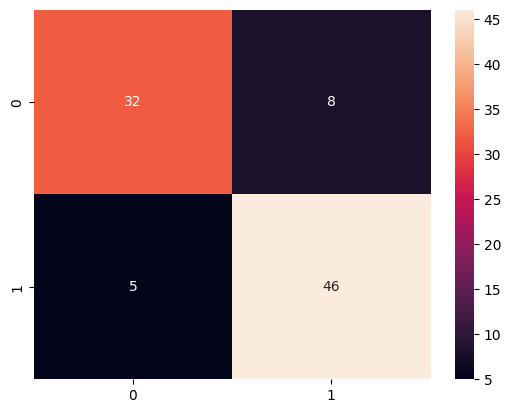

In [182]:
print('Confusion matrix of Logistic Regression using heatmap')
sns.heatmap(lr_conMat,annot=True)

Confusion matrix of Decision Tree using heatmap


<Axes: >

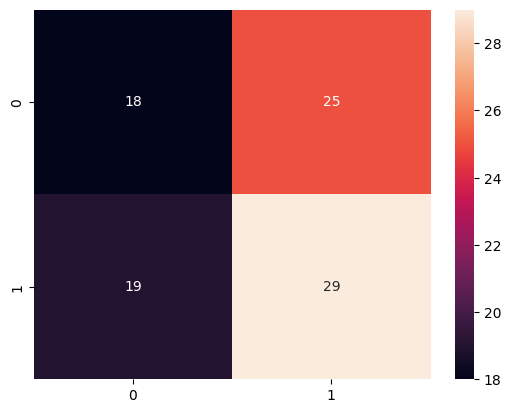

In [183]:
print('Confusion matrix of Decision Tree using heatmap')
sns.heatmap(dt_conMat,annot=True)

Confusion matrix of Random Forest using heatmap


<Axes: >

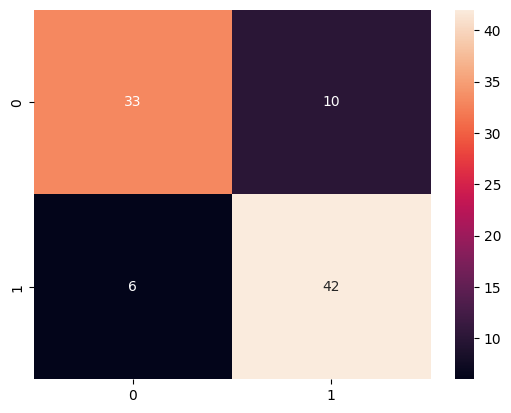

In [184]:
print('Confusion matrix of Random Forest using heatmap')
sns.heatmap(rf_conMat,annot=True)

###c. Calculate Recall Precision and F1 score of all the models. Select the best model based on the best accuracies

Based on above generated classification reports and visualized heatmaps, it is clear that **Decision Tree is the best model** for this particular dataset as it gives the highest accuracy of 86% after hyperparameter tuning without which it gives relatively low accuracy of 51%.

On the other hand Logistic Regression is the next best model giving 85% of accuracy. While Random Forest results in 82% accuracy, its performance can also be improved by hyperparameter tuning